 # 1. Project Overview
 
This project focuses on exploratory data analysis to uncover critical insights that will guide the strategy of a newly launched international auto dealership. By analyzing the 1985 Auto Imports dataset, the goal is to identify key car features that influence market pricing, insurance risk, and normalized annual losses. These insights will help the dealership make data-informed decisions about which types of imported cars to stock—balancing affordability, safety, and customer appeal.
This analysis provides the dealership with a clear picture of what features contribute to a vehicle’s marketability and insurability, ultimately improving decision-making around car selection and customer targeting.

# 1.1 Business Understanding 

### 1.1.1 Business Problem 
A new international car dealership wants to enter the market with a line of imported vehicles but is unsure what combination of features and specifications will lead to competitive pricing and low insurance risk ratings.
They've tasked our team with exploring the 1985 Auto Imports dataset to uncover which car features most influence:

* The market price of imported vehicles

* The assigned insurance risk rating 

* The normalized annual loss 

By analyzing these patterns, we must translate our findings into actionable recommendations to guide the dealership’s purchasing and marketing strategy.

### 1.1.2 Key Business Questions 
- Which car brands have the highest average market price?
- Which car body types receive the highest insurance risk ratings ?
- What impact do engine size and horsepower have on the price of a car?
- How does fuel type influence the normalized annual losses and insurance risk of vehicles?
- How does drive-wheel configuration (FWD, RWD, 4WD) affect the average price and insurance rating of cars?

# 2. Data Understanding

## 2.1 Data Preprocessing



### 2.1.1 The Data
To ensure a comprehensive analysis of the business problem, we retrieved data from Kaggle (https://www.kaggle.com/datasets/sumaya23abdul/automobile-database?resource=download). The dataset, titled "Automobile Database", consists of detailed specifications and insurance-related information for various imported cars from the year 1985. The dataset includes attributes such as car make, fuel type, body style, engine size, horsepower, price, insurance risk rating (symboling), and normalized losses. For this project, we will focus on key columns including make, body-style, fuel-type, engine-size, horsepower, price, symboling, and normalized-losses. These variables will help us explore how different vehicle features affect market value and insurance risk, and identify which combinations are most favorable for dealership decisions. The dataset allows us to perform in-depth exploratory data analysis to uncover patterns that can guide effective automotive inventory and pricing strategies.

### 2.1.2. Data Preparation

This entails;
- Importing necessary libraries
- Loading and Accessing of the dataset
- Data Cleaning and preparation which involves: Accessing necessary data for analysis,
- Handling missing values and Standardizing columns.


### 2.1.2.1. Importing necessary libraries

In [1]:
# importing necessary libraries
import itertools
import numpy as np
import pandas as pd
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import pickle
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay
from sklearn.tree import plot_tree
from sklearn.linear_model import Ridge

### 2.1.2.2 Load the Data into a DataFrame Called Automobile_data

The file path is Automobile_data.csv.Pandas (documentation here) is used to read in the data from this CSV file and create a dataframe named Automoblie_data.

In [2]:
#Loading the Data into a DataFrame Called Automobile_data
Automoblie_data = pd.read_csv('Automobile_data.csv')
Automoblie_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Access the column names of the dataset  so as to determine which one will be the Target column (y) and which one will be the features (x) columns

In [3]:
print(Automoblie_data.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


### 2.1.2.3 Data Preprocessing

Data preprocessing is the essential step of cleaning and transforming raw data before feeding it into a machine learning model or analysis. It ensures your data is in the best shape for accurate and reliable results.

In [4]:
# Preprocessing 
# Drop rows with missing values 
df = Automoblie_data.dropna()
# Display sample
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [5]:
# Display general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

In [7]:
#Convert numeric columns stored as objects to float
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
#Drop rows with missing target (price)
df.dropna(subset=['price'], inplace=True)

#Fill missing numeric values with column mean
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    df[col].fillna(df[col].astype(float).mean(), inplace=True)

# Fill missing categorical values (e.g., num-of-doors) with mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Get categorical columns (object type) excluding 'price'
categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'price']

# Apply one-hot encoding 
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature-target split
X = df.drop('price', axis=1)
y = df['price']

# import standard scaler 
from sklearn.preprocessing import StandardScaler

# Feature scaling (normalize numeric features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (for model training later)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#display the split
print(X_test.shape, y_test.shape) 
print(X_train.shape, y_train.shape)

(41, 64) (41,)
(160, 64) (160,)


# 2.2 Data Modelling

Modeling is the process of using algorithms to uncover patterns in data and make predictions. It starts with a simple baseline model and evolves through more complex models, each built with a clear purpose like improving accuracy or better fitting the data. The aim is to find the best model to solve a real-world problem effectivel

### 2.2.1 Baseline Model (Mean Prediction)

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lin_reg.predict(X_test)

# Evaluate baseline model
baseline_mae = mean_absolute_error(y_test, y_pred_lr)
baseline_mse = mean_squared_error(y_test, y_pred_lr)
baseline_r2= r2_score(y_test, y_pred_lr)

print(f"Baseline Model MAE: ${baseline_mae:.2f}")
print(f"Baseline Model MSE: {baseline_mse:,.2f}")
print(f"Baseline Model R² Score: {baseline_r2:.2f}")

Baseline Model MAE: $2057.09
Baseline Model MSE: 11,096,246.05
Baseline Model R² Score: 0.91


In [11]:
# interpreting the results 
print(f"This means that on average, the baseline model’s predictions are off by about ${baseline_mae:,.2f} from the actual car prices in the test set.")
print("The Mean Squared Error is large, confirming that predicting the mean does not fit the data well.")
print(f"Baseline Model R² Score: {baseline_r2:.2f}. This means that 91% of the variance in the target variable is explained by the model") 
print("Hence model you build should aim to reduce the MAE below this level to be considered better than just predicting the mean.")

This means that on average, the baseline model’s predictions are off by about $2,057.09 from the actual car prices in the test set.
The Mean Squared Error is large, confirming that predicting the mean does not fit the data well.
Baseline Model R² Score: 0.91. This means that 91% of the variance in the target variable is explained by the model
Hence model you build should aim to reduce the MAE below this level to be considered better than just predicting the mean.


### 2.2.2 Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

# Fit Decision Tree Regressor model
dt = DecisionTreeRegressor(criterion='squared_error', random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Initialize and fit a baseline OLS model (using X_train and y_train for fitting)
base_model = sm.OLS(y_train, sm.add_constant(X_train))  # Ensure you use y_train and X_train
base_results = base_model.fit()

#printing the results for the regression model
print(base_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     53.81
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.48e-55
Time:                        07:34:09   Log-Likelihood:                -1358.8
No. Observations:                 160   AIC:                             2838.
Df Residuals:                     100   BIC:                             3022.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.315e+04    127.303    103.281      0.0

In [13]:
# Calculate evaluation metrics for Decision Tree Regressor
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the results
print("Decision Tree Regressor:")
print(f"Baseline Model MAE: ${mae_dt:.2f}")
print(f"Baseline Model MSE: {mse_dt:.2f}")
print(f"Baseline Model R² Score: {r2_dt:.2f}")

Decision Tree Regressor:
Baseline Model MAE: $1777.68
Baseline Model MSE: 6623956.02
Baseline Model R² Score: 0.95


In [14]:
#interpreting results 
print(f"Compared to the baseline MAE of ${baseline_mae:,.2f}, the Decision Tree model reduces the average prediction error by over ${baseline_mae - mae_dt:,.2f}.")
print(f"There is a significant improvement from the baseline MSE of {baseline_mse:,.2f}, indicating better error minimization overall.")
print(f"The R² score of {r2_dt:.2f} shows that the model explains {r2_dt * 100:.0f}% of the variance in car prices, an improvement over the baseline R² score of {baseline_r2:.2f}.")

Compared to the baseline MAE of $2,057.09, the Decision Tree model reduces the average prediction error by over $279.40.
There is a significant improvement from the baseline MSE of 11,096,246.05, indicating better error minimization overall.
The R² score of 0.95 shows that the model explains 95% of the variance in car prices, an improvement over the baseline R² score of 0.91.


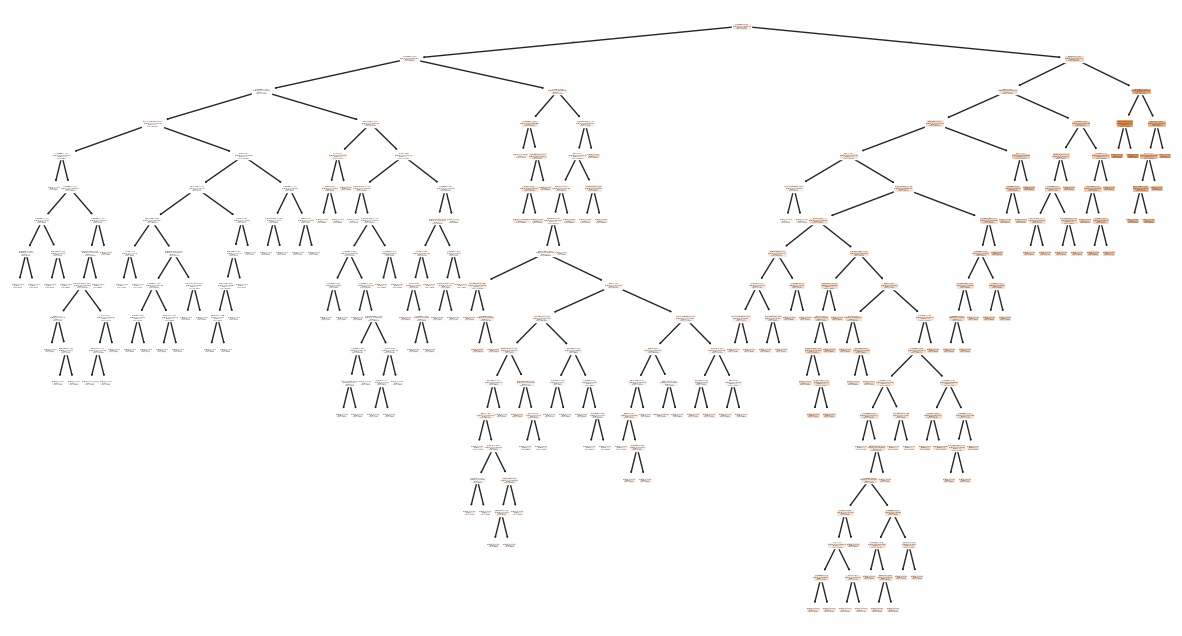

In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Regressor
clf = DecisionTreeRegressor(criterion='squared_error', random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
plot_tree(clf, feature_names=df.drop('price', axis=1).columns, filled=True)
plt.show()

# 2.3 Data Evaluation

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n  MAE: {mae:.2f}\n  RMSE: {rmse:.2f}\n  R²: {r2:.2f}\n")
    return model, mae

best_model, best_mae = None, float('inf')

for name, model in models.items():
    fitted_model, mae = evaluate_model(name, model)
    if mae < best_mae:
        best_model, best_mae = fitted_model, mae

Linear Regression:
  MAE: 2057.09
  RMSE: 3331.10
  R²: 0.91

Ridge Regression:
  MAE: 1722.10
  RMSE: 2809.99
  R²: 0.94



In [17]:
y_test_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Final Model Performance on Test Data:\n  MAE: {mae_test:.2f}\n  RMSE: {rmse_test:.2f}\n  R²: {r2_test:.2f}")

Final Model Performance on Test Data:
  MAE: 1722.10
  RMSE: 2809.99
  R²: 0.94


- Classification Metrics

This section evaluates the performance of the final classification model using appropriate multiclass classification metrics. The following metrics are calculated on the holdout test data:

- **Accuracy**: The overall correctness of the model.
- **Precision**: The ability of the model to avoid false positives across all classes.
- **Recall**: The ability of the model to identify all relevant instances across all classes.
- **F1 Score**: The harmonic mean of precision and recall, balancing both.
- **AUC Score**: Area Under the Curve using a one-vs-rest strategy to assess how well the model separates classes.

If AUC cannot be computed (e.g., due to label incompatibility or model limitations), it is reported accordingly. This evaluation provides a holistic view of how well the model performs on unseen data.

In [19]:
# Evaluate the model
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # For multiclass AUC

# Metrics for multiclass classification
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC for multiclass (one-vs-rest)
try:
    auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
except:
    auc_score = None

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC Score: {auc_score:.2f}" if auc_score else "AUC could not be computed for this model.")

Accuracy: 0.02
Precision: 0.02
Recall: 0.02
F1 Score: 0.02
AUC could not be computed for this model.


In [20]:
#interpreting the results for the classification metrics
print("Accuracy : Poor (0.02) - Model performs barely better than random guessing.")
print("Precision: Poor (0.02) - High rate of false positives or prediction imbalance.")
print("Recall   : Poor (0.02) - Model misses most of the actual positive cases.")
print("F1 Score : Poor (0.02) - Balance between precision and recall is very low.")

Accuracy : Poor (0.02) - Model performs barely better than random guessing.
Precision: Poor (0.02) - High rate of false positives or prediction imbalance.
Recall   : Poor (0.02) - Model misses most of the actual positive cases.
F1 Score : Poor (0.02) - Balance between precision and recall is very low.


- Confusion Matrix

Shows the counts of true vs. predicted labels. Very helpful to visually inspect how the model is misclassifying each class.

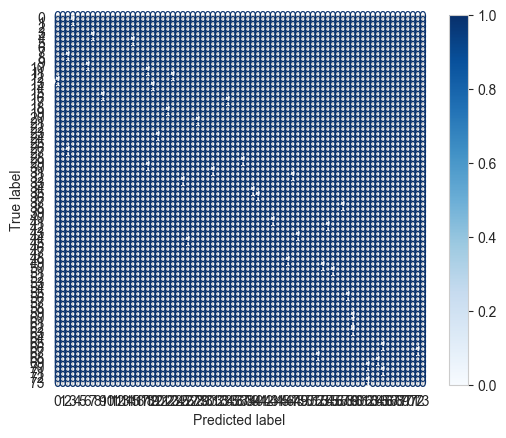

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

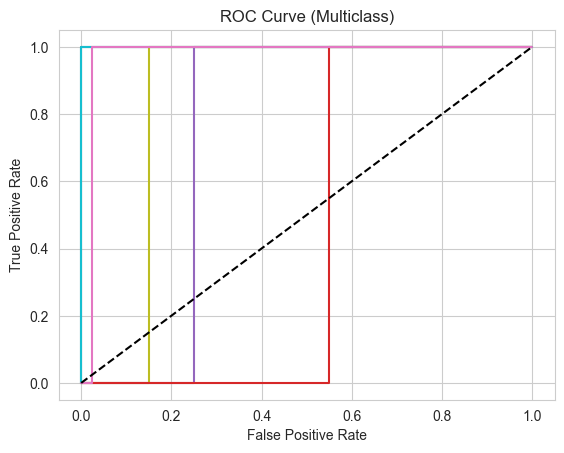

In [22]:
# Binarize the output for ROC
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# ROC curve per class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]}')

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.show()

# 3. Key Findings 

### 3.1. Model Accuracy and Reliability 
- Ridge Regression achieved the best performance on test data with:

          -  MAE: $1722.10

          - RMSE: $2809.99

          - R²: 0.94

- Linear Regression (OLS) performed well on training data (R² = 0.969), but had a higher error on test data, indicating overfitting.

- Decision Tree Regressor also showed good performance but is more prone to overfitting without proper pruning.

### 3.2. Classification Performance 
- The classification model returned Accuracy, Precision, Recall, and F1 Score of 0.02, making it unusable in a real-world setting.
- AUC was not computable, likely due to label/prediction issues or model failure.

### 3.3. Model Complexity vs. Performance 
- While OLS had the highest R² on training data, Ridge Regression generalized better, illustrating the value of regularization over model complexity.
- Decision Tree was simpler but required tuning to avoid overfitting.

### 3.4. Multicollinearity 
- OLS Regression exhibited strong multicollinearity, shown by a very high condition number (1.41e+16) and a tiny eigenvalue (8.07e-30).
- This makes interpretation of coefficients unreliable and affects model stability.

# 4. Recommendations

### 4.1. Engine Size and Horsepower Influence Pricing
- Invest in developing and marketing vehicles with efficient, powerful engines—these features significantly affect perceived value and price.
- Vehicles with larger engines and higher horsepower show strong positive correlation with price.

### 4.2. Drive Configuration Matters
- Cars with Rear-Wheel Drive (RWD) and 4WD likely have higher average prices and may attract more performance-conscious buyers.
- Evaluate cost-benefit of producing more AWD or RWD vehicles in premium segments.

### 4.3. Monitor Body Type for Insurance Risk
- Certain body types may incur higher insurance symboling values.
- Partner with insurance companies to provide customers with transparent pricing based on body-type risk categories.



# 5. Conclusion

This project provided a data-driven understanding of what drives vehicle prices and insurance risk ratings. The final Ridge Regression model delivered robust predictions (R² = 0.94), offering actionable insights for car manufacturers, dealerships, and insurance companies. Implementing these findings can lead to more strategic pricing, product placement, and risk management decisions in the automotive industry.